A ideia desse notebook, é explicar como realizar a leitura do arquivo do whats.

In [1]:
#Code Powered by: https://github.com/rolemberg
#bibliotca para formatar data.
import datetime

#
from collections import Counter

#
import collections

#
import pandas as pd

#
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Processo para abrir o arquivo e codificá-lo para UTF-8. Instrução r' usada pois OS é Windows.
ref_arquivo = open(r'C:\Users\FRS\Documents\PythonScripts\Faculdade_Impacta\Aula_1\Whatsapp\chat.txt', encoding ='utf-8')

#variável para armazenar a primeira linha do arquivo lido
linha = ref_arquivo.readline()

#criada variáveis para armazenar data, linhas com erros, contatos e conversas:
list_datas = []
list_erros_formatacao = []
list_pessoas = []
list_msgs = []

#Laço irá inspecionar cada linha e...
while linha:
    linha = ref_arquivo.readline()
    
    try:
        date_time_obj = datetime.datetime.strptime(linha[1:20], '%d/%m/%Y %H:%M:%S') #fatiar caracteres da data e transformá-los em objetos
        list_datas.append(date_time_obj) #armazenar datas na lista
        msg = linha[21:] #Fatiar restante do texto 
        if(len(msg.split(':')) >= 2): #verifica se a msg é uma linha de conversa válida
            list_pessoas.append(msg.split(':')[0]) #Armazena o contato que vem antes dos dois pontos na lista
            list_msgs.append(msg.split(':')[1]) #Armazena a conversa que vem depois dos dois pontos na lista
    except ValueError: #linhas que não possuem esta estrutura são armazenados na lista de erros
        list_erros_formatacao.append('Errors de formatação de data')
ref_arquivo.close()

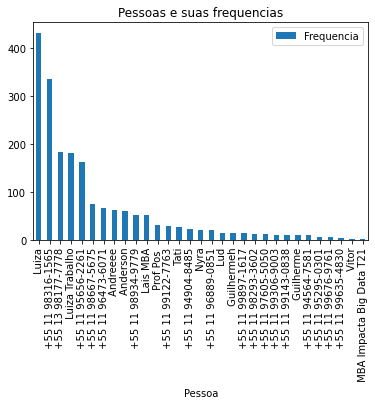

In [8]:
#Cria um dicionário para contabilizar números de contatos da lista de pessoas
dict_pessoas = dict(Counter(list_pessoas))

#Criado Dataframe onde os contatos são chaves e a freqência os valores:
pessoas_df = pd.DataFrame(dict_pessoas.items(), columns=['Pessoa', 'Frequencia'])

#Instrução para ordenar os valores pela frequênci
pessoas_df = pessoas_df.sort_values(by=['Frequencia'], ascending=False)

#instrução do gráfico para exibir os resultados
pessoas_df.plot(kind='bar', x = 'Pessoa', y='Frequencia', title='Pessoas e suas frequencias')

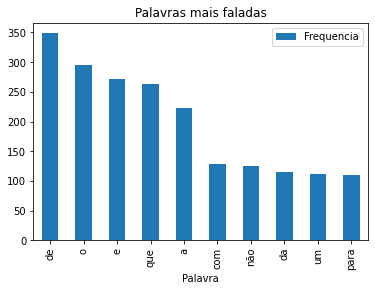

In [9]:
#Criado laço para quebrar as palavras das mensagens:
def contador_palavras(msgs):
    palavras = []
    for frases in msgs:
        for palavra in frases.split():
            palavras.append(palavra)
    return Counter(palavras)

#Dicionário criado para contabilizar as palavras
palavras_dict = dict(contador_palavras(list_msgs))

#Dataframe criado para separar as palavras e frequência
palavras_df = pd.DataFrame(palavras_dict.items(), columns=['Palavra', 'Frequencia'])

#Instrução para ordenar os valores pela frequencia
palavras_df = palavras_df.sort_values(by=['Frequencia'], ascending=False)

#Instrução para exibir os resultados por gráfico
palavras_df.head(10).plot(kind='bar', x = 'Palavra', y='Frequencia', title='Palavras mais faladas')

In [10]:
#Code changed by https://github.com/faribeiro07

#Dicionário com índice do dia da semana e que será usado no laço
dia_da_semana = {0: "Domingo",1: "Segunda",2: "Terça",3: "Quarta",4: "Quinta",5: "Sexta",6: "Sábado"}

#Definição das listas vazias com horas e dia da semana
list_horas = []
list_dia_semana = []

for data in list_datas:
    list_horas.append(data.time().hour) #Laço irá separar as horas e preencherá a lista
    list_dia_semana.append(dia_da_semana.get(data.weekday())) #índice do dia da semana será consultado no dicionário e salvo na lista

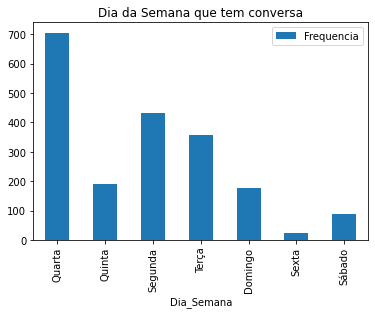

In [12]:
#Criado dicionário para contabilizar os dias da semana mais frequentes
dict_dia_semana = dict(Counter(list_dia_semana))

#instruções para exibir resultados:
semana_df = pd.DataFrame(dict_dia_semana.items(), columns=['Dia_Semana', 'Frequencia'])
semana_df.plot(kind='bar', x = 'Dia_Semana', y='Frequencia', title='Dia da Semana que tem conversa')

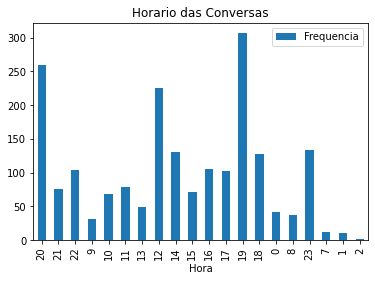

In [13]:
#Instruções para exibir resultados por hora:
dict_horas = dict(Counter(list_horas))
horas_df = pd.DataFrame(dict_horas.items(), columns=['Hora', 'Frequencia'])
horas_df.plot(kind='bar', x = 'Hora', y='Frequencia', title='Horario das Conversas')

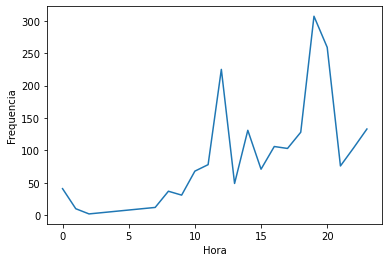

In [14]:
#Outro método para exibir os resultados por hora.
ax = sns.lineplot(x="Hora", y="Frequencia", data=horas_df, ci=68)